## Importing Libraries

In [1]:
import torch
import torch.nn as nn

In [2]:
# Device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

## Get Data

The Dataset is subset of the Food101 dataset
Food101 starts 101 different classes of food and 1000 images per class(750 training, 250 testing)

The subset I created that consists of 3 classes of food and only 10% of the images(~75 training, 25 testing)

It's important to try things on a small scale and then increase the scale when necessary. 

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists..... skipping download")

else:
    print(f"{image_path} does not exist, creating one....")
    image_path.mkdir(parents=True,exist_ok=True)

    # Download pizza, steak and sushi data
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get( 
    print("Downloading pizza, steak, sushi data....")
    f.write(request.content)

# Unzip pizza steak sushi zip file 
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza, steak and sushi data....")
    zip_ref.extractall(image_path)
    

data/pizza_steak_sushi directory already exists..... skipping download
Unzipping pizza, steak and sushi data....


In [4]:
# so now I can download everything
# first create the directory
# first create the outer file
# then the inner file
# then set mkdir
# with open(pathname/desired file where we want to download, wb) as f: wb--> write binary, f--> file
# request = request.get("the file we want to download")
# now convert the download file into that converted file
# f.write(request.content)


In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

## Data Preparation and Exploration

In [6]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its content"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 1 images in 'data/pizza_steak_sushi'.
There are 3 directories and 1 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [8]:
train_dir = image_path/'train'
test_dir = image_path/'test'

In [9]:
 train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualizing image

1. Get all the image paths.
2. pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. For image we should open the image with Python's PIL
5. After that, show the image and print metadata 

Random image path: data/pizza_steak_sushi/train/sushi/3004029.jpg
Random image class: sushi
Image height:512
Image width: 512


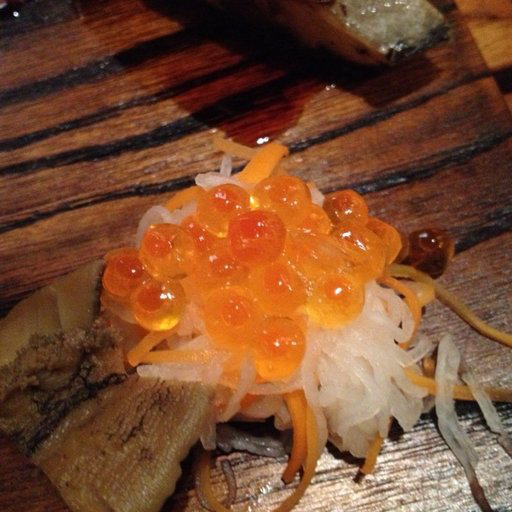

In [10]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all the image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where theimage is stored)
image_class = random_image_path.parent.stem # parent indicates the name of the folder and stem indicates the end part of the name of the folder
#print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print the data
print(f"Random image path: {random_image_path}")
print(f"Random image class: {image_class}")
print(f"Image height:{img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 288.5, -0.5)

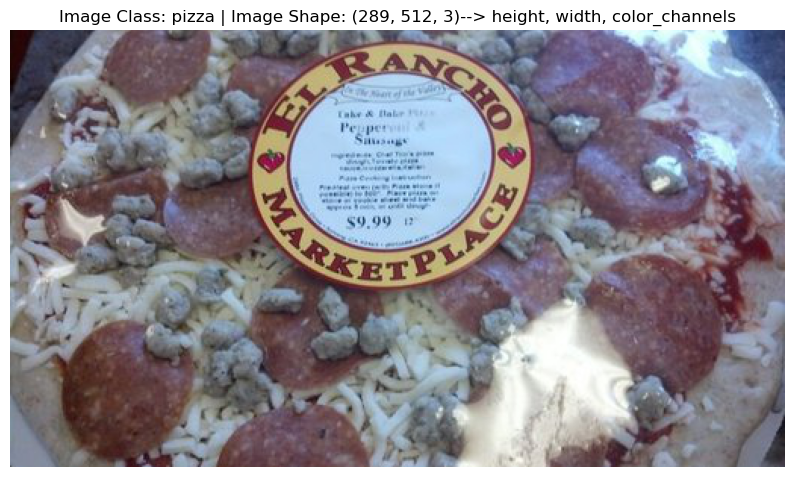

In [11]:
# Try to visualize image with matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 1. Get the image path of all the images
image_path_list_mat = list(image_path.glob("*/*/*.jpg"))

# 2. randomly choose an image
random_image_path = random.choice(image_path_list_mat)

# 3. The class of the random image
random_image_class = random_image_path.parent.stem

# 4. Get the image
img = Image.open(random_image_path)

# 5. Turn the image into tensors
image_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize = (10,7))

plt.imshow(image_as_array)
plt.title(f"Image Class: {random_image_class} | Image Shape: {image_as_array.shape}--> height, width, color_channels")
# If I don't turn the image into tensors I don't get the shape of the image file

plt.axis('off')

The *```color channel```* of the image is at `last`, which is default for matplotlib library and PIL library but PyTorch want the color channel of the image at `first`

In [12]:
image_as_array

array([[[ 24,   6,   2],
        [ 27,   8,   4],
        [ 30,   9,   6],
        ...,
        [ 46,  58,  98],
        [ 47,  59,  99],
        [ 48,  57,  98]],

       [[ 24,   6,   2],
        [ 27,   8,   4],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 48,  60, 100],
        [ 47,  56,  97]],

       [[ 26,   7,   3],
        [ 28,   9,   5],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 46,  58,  98],
        [ 44,  53,  94]],

       ...,

       [[123, 132, 149],
        [126, 135, 152],
        [129, 138, 155],
        ...,
        [ 65,  57,  68],
        [ 66,  58,  69],
        [ 67,  59,  70]],

       [[118, 127, 144],
        [122, 131, 148],
        [127, 136, 153],
        ...,
        [ 69,  61,  72],
        [ 67,  59,  70],
        [ 66,  58,  71]],

       [[ 79,  86,  92],
        [121, 130, 139],
        [130, 138, 151],
        ...,
        [ 71,  69,  82],
        [ 72,  70,  83],
        [ 66,  64,  78]]

## Transforming Data

Before we can use our image data with PyTorch

1. Turn our target data into tensors (in our case, numerical representation of image data)
2. Turn it into a `torch.utils.data.Dataset` and subsequently `torch.utils.data.Dataloader` 

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### Transform data with torchvision.transforms

Turning jpegs into Tensors

Transform helps you get your images ready to be used with a model/perform data augmentation

In [14]:
# a transform for image
data_transform = transforms.Compose([
    # it takes a list

    # Resize our images to 64X64 because our  TinyVGG model takes the input image in this shape
    transforms.Resize(size = (64,64)),

    # Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5), # that p indicates 50% of the time the image passes through the image, it got flip
    
    # convert the image into tensors
    transforms.ToTensor()
])

In [15]:
data_transform(img)

tensor([[[0.1922, 0.2078, 0.2157,  ..., 0.2039, 0.1529, 0.1412],
         [0.2118, 0.2039, 0.2118,  ..., 0.2157, 0.1608, 0.1451],
         [0.2353, 0.2196, 0.2431,  ..., 0.2314, 0.1843, 0.1490],
         ...,
         [0.2078, 0.3725, 0.4627,  ..., 0.4902, 0.5216, 0.5098],
         [0.1961, 0.3059, 0.4549,  ..., 0.5098, 0.5216, 0.5098],
         [0.2510, 0.3255, 0.4510,  ..., 0.5137, 0.5216, 0.5059]],

        [[0.2510, 0.2784, 0.2980,  ..., 0.1961, 0.0510, 0.0235],
         [0.2667, 0.2745, 0.2941,  ..., 0.2196, 0.0824, 0.0235],
         [0.2902, 0.2902, 0.3216,  ..., 0.2392, 0.1216, 0.0235],
         ...,
         [0.2000, 0.3843, 0.4706,  ..., 0.5137, 0.5451, 0.5412],
         [0.1804, 0.3137, 0.4706,  ..., 0.5373, 0.5451, 0.5412],
         [0.2392, 0.3294, 0.4627,  ..., 0.5490, 0.5451, 0.5412]],

        [[0.4118, 0.4510, 0.4941,  ..., 0.2549, 0.0745, 0.0235],
         [0.4314, 0.4510, 0.4902,  ..., 0.3059, 0.1137, 0.0235],
         [0.4588, 0.4706, 0.5255,  ..., 0.3294, 0.1647, 0.

In [16]:
data_transform(img).shape

torch.Size([3, 64, 64])

## Visualize transformed image

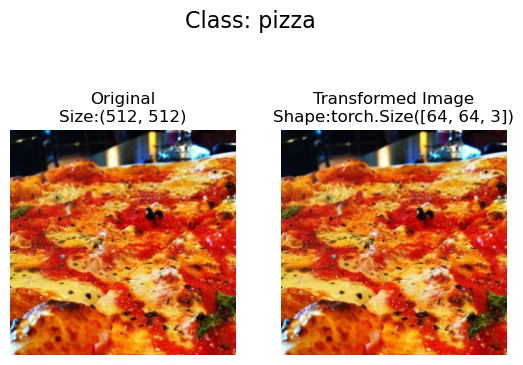

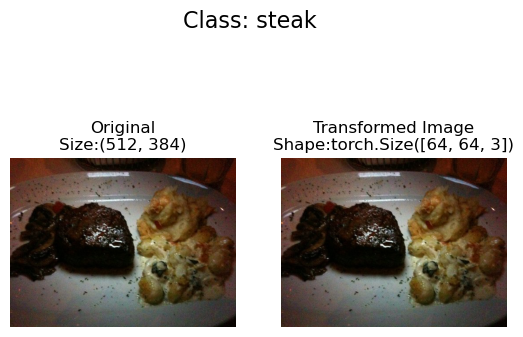

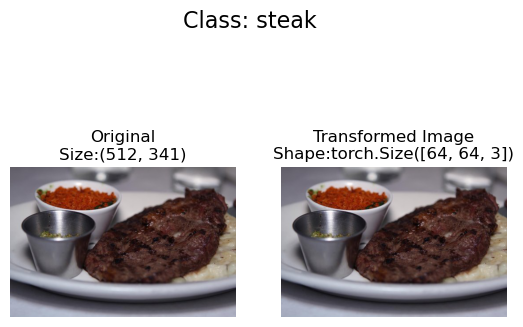

In [17]:
def plot_transformed_images(image_paths: list, transform,n =3, seed = None):
    """
    n : number of images we want to transform at a time

    Pipeline: 
    1. Randomly selected some image paths
    2. Then pass those images through the transfrom function
    3. Plot those images and compared the images with original ones.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths,k =n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(nrows = 1, ncols = 2)

            # plot the image
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize:{f.size}")
            ax[0].axis(False)

            # Now plot the transformed image
            transformed_img = transform(f).permute(1,2,0) # F --> (C,H,W) after transform it turns into (H,W,C)
            ax[1].imshow(f)
            ax[1].set_title(f"Transformed Image\nShape:{transformed_img.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"Class: {image_path.parent.stem}",fontsize = 16)


plot_transformed_images(image_paths=image_path_list,
                       transform = data_transform,
                       seed = 42)

## Loading Image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

In [18]:
# Use ImageFolder to create dataset

from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir, # image_path/train = train_dir
                                 transform=data_transform, 
                                 target_transform=None) # Target expresses labels or class

test_data = datasets.ImageFolder(root = test_dir, # image_path/test = test_dir
                                transform = data_transform)

In [19]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
len(train_data),len(test_data)

(225, 75)

In [23]:
sample_1,label=train_data.samples[0]

In [24]:
sample_1

'data/pizza_steak_sushi/train/pizza/1008844.jpg'

Text(0.5, 1.0, 'pizza')

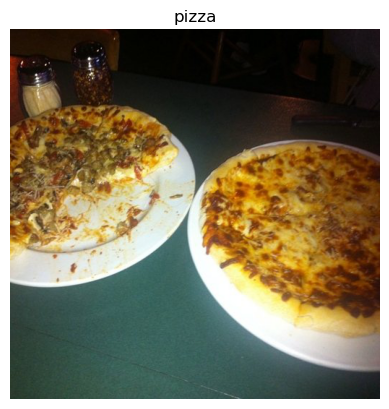

In [25]:
img = Image.open(sample_1)
img = np.asarray(img)
plt.imshow(img)
plt.axis(False)
plt.title(class_names[label])

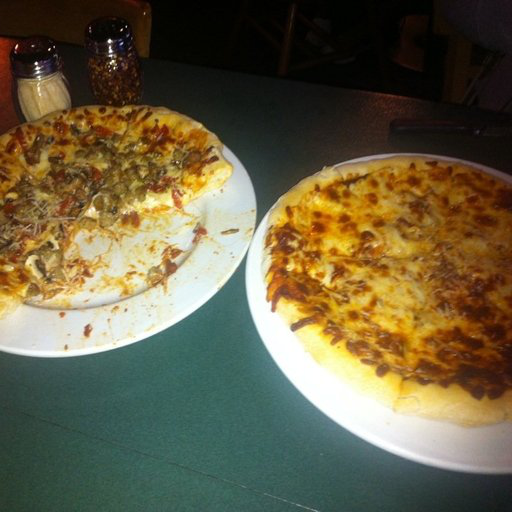

In [26]:
Image.open(sample_1)

In [27]:
# Get idea about a single image
first_img,label = random.choice(train_data)
print(f"First Image:\n {first_img}")
print(f"Image Shape: {first_img.shape}")
print(f"Image Datatype: {first_img.dtype}")
print(f"Image Label:{label}")

First Image:
 tensor([[[0.4667, 0.4706, 0.5137,  ..., 0.2078, 0.2157, 0.2000],
         [0.4392, 0.4392, 0.4353,  ..., 0.2078, 0.1843, 0.1804],
         [0.4275, 0.4000, 0.3216,  ..., 0.2157, 0.1961, 0.1804],
         ...,
         [0.3412, 0.3216, 0.4039,  ..., 0.6196, 0.6392, 0.6078],
         [0.3333, 0.3451, 0.3765,  ..., 0.5804, 0.6157, 0.6039],
         [0.3608, 0.3804, 0.3843,  ..., 0.5373, 0.5922, 0.6078]],

        [[0.3373, 0.4471, 0.5333,  ..., 0.2196, 0.2784, 0.2471],
         [0.1843, 0.2078, 0.2392,  ..., 0.2078, 0.1922, 0.1961],
         [0.1490, 0.1294, 0.1961,  ..., 0.2078, 0.2039, 0.2157],
         ...,
         [0.3843, 0.3529, 0.4196,  ..., 0.6627, 0.7098, 0.6353],
         [0.3843, 0.3882, 0.3922,  ..., 0.5843, 0.6824, 0.6549],
         [0.4392, 0.4549, 0.4510,  ..., 0.5137, 0.6471, 0.6784]],

        [[0.5176, 0.6588, 0.7255,  ..., 0.2941, 0.3608, 0.3373],
         [0.3020, 0.3490, 0.4118,  ..., 0.2784, 0.2706, 0.2784],
         [0.2667, 0.2510, 0.3686,  ..., 0.28

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Permute Image shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

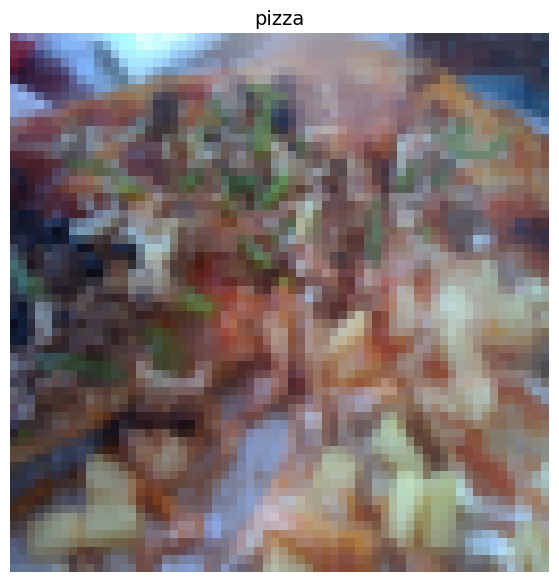

In [28]:
# Rearrange the order dimensions
img_permute = first_img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {first_img.shape} -> [color_channels, height, width]")
print(f"Permute Image shape: {img_permute.shape} -> [height, width, color_channels]")

#plot the image
plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize = 14)

## Trying other type of Image Augmentation

In [29]:
# The transform function
image_transform = transforms.Compose([

    transforms.Resize(size = (224,224)),

    transforms.RandomAutocontrast(p = 0.5),

    transforms.RandomHorizontalFlip(p = 0.5),

    transforms.ToTensor()
])

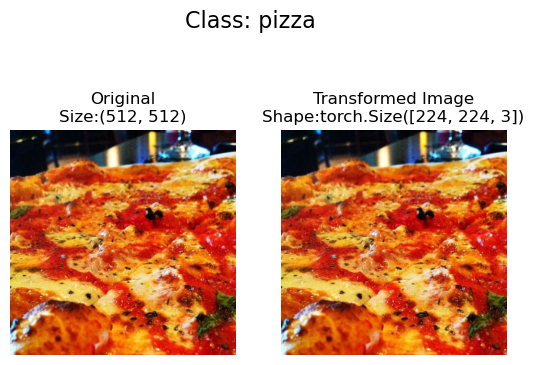

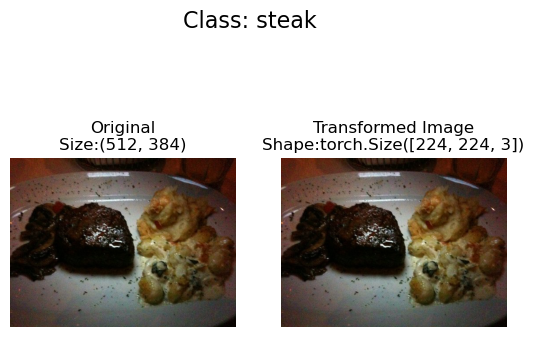

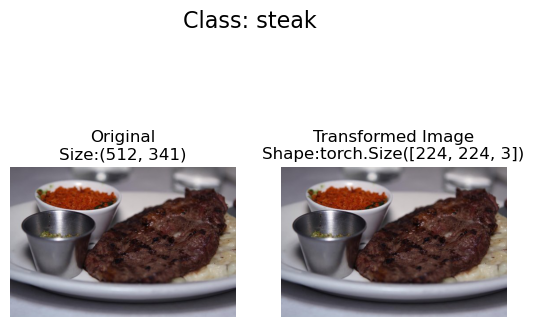

In [30]:
plot_transformed_images(image_paths=image_path_list,
                       transform = image_transform,
                       seed = 42)

In [31]:
type(train_dir)

pathlib.PosixPath

In [32]:
import os
os.cpu_count()

8

In [33]:
len(train_data),len(test_data)

(225, 75)

## DataLoader

In [34]:
# Train DataLoader, Test DataLoader
batch_size = 32
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset =train_data,
                             batch_size = batch_size,
                             num_workers = 1,
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = batch_size,
                            num_workers = 1,
                            shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x14adf3550>,
 <torch.utils.data.dataloader.DataLoader at 0x14acc1510>)

In [35]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [36]:
img, label = next(iter(train_dataloader))
img,label # img--> one batch image, label --> label of 32 images

(tensor([[[[0.6627, 0.6824, 0.4902,  ..., 0.7098, 0.3725, 0.3686],
           [0.7059, 0.7176, 0.6196,  ..., 0.7216, 0.4863, 0.3843],
           [0.7216, 0.7529, 0.7333,  ..., 0.6588, 0.5725, 0.4000],
           ...,
           [0.1686, 0.1686, 0.1804,  ..., 0.2863, 0.3059, 0.3137],
           [0.1647, 0.1882, 0.2000,  ..., 0.2588, 0.2784, 0.2824],
           [0.1804, 0.1922, 0.2078,  ..., 0.1333, 0.1961, 0.2314]],
 
          [[0.5373, 0.5569, 0.3647,  ..., 0.7059, 0.3922, 0.4078],
           [0.5725, 0.5882, 0.4980,  ..., 0.6784, 0.4627, 0.4275],
           [0.5765, 0.6157, 0.6039,  ..., 0.6039, 0.5098, 0.4314],
           ...,
           [0.0941, 0.0902, 0.0941,  ..., 0.1686, 0.1961, 0.2157],
           [0.0902, 0.0902, 0.0941,  ..., 0.1373, 0.1569, 0.1765],
           [0.0941, 0.1020, 0.0980,  ..., 0.0784, 0.1137, 0.1412]],
 
          [[0.4980, 0.5098, 0.3216,  ..., 0.7333, 0.3922, 0.3569],
           [0.5294, 0.5451, 0.4549,  ..., 0.7412, 0.4549, 0.3529],
           [0.5686, 0.58

In [37]:
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Loading Image Data with a custom dataset

`Target:`

1. Load Images from file
2. Get class names from the dataset
3. Get Classes as Dictionary from the dataset

`Pros:`

1. Can create a `dataset` out of almost anything
2. Not limited to PyTorch pre-built `Dataset`function

`Cons:`

1. Hard to work
2. Writing a lot of codes, hence prone to errors

In [38]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [39]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a helper Funciton to get class names

We want a function to : 

1. Get the class names using *`os.scandir()`* to traverse a target directory (ideally the directory is in standard image classification format)

*`Standard Image Classification Format:`*
* train folder
* test folder 
* Images for particular class are in a particular format
* for example:
* Main folder:
    * Train
        * Pizza
        * Steak
        * Sushi 
    * Test
        * Pizza
        * Steak
        * Sushi 

2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them

In [43]:
# Set up path for target directory

target_directory = train_dir
print(f"Target Directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found


Target Directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [44]:
def find_classes(directory: str) -> Tuple[List[str],Dict[str,int]]:
    """we want out output function like this:
    (['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

    Find the class folder names in a target directory
"""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}...Please check file structure")

    # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)

    class_to_idx =  {class_name: i for i,class_name in enumerate(classes)}

    return classes, class_to_idx

In [45]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Create a custom dataset to replicate `ImageFolder`

To Create our own custom dataset, we should:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the  directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:

  * paths - paths of our images
  * transform - the transform we would like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels.

4. Create a function to `load_images()`, this funciton will  open an image
5. Overwrite the `__len()__`method to return the length of our dataset.
6. Overwrite the `__getitem__()` method to return a given sample when passed an index

In [46]:
# Write a custom dataset Class
from torch.utils.data import Dataset


class ImageFolderCustomDataset(Dataset):
    def __init__(self,
                 image_dir:str,
                transform = None ):

        # Create Class Attributes

        # Get all the image paths
        self.paths = list(pathlib.Path(image_dir).glob('*/*.jpg'))

        # Setup Transform
        self.transform = transform

        # Create Classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(image_dir)


    def load_image(self,index:int) ->Image.Image:
        "Opens an image via a path and returns it"
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self):
        "Returns the total number of samples"
        return len(self.paths)

    def __getitem__(self,index:int) -> Tuple[torch.Tensor, int]:
        """img,label = train_data[0] -> Get item gonna replicate this
        Returns one sample of data,and label (X,y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img),class_idx
        else:
            return img, class_idx
        


In [47]:
# Build a Transform

train_transform = transforms.Compose([
 transforms.Resize(size = (64,64)),
 transforms.RandomHorizontalFlip(p = 0.5),
 transforms.ToTensor()
])

test_transform = transforms.Compose([
 transforms.Resize(size = (64,64)),
 transforms.ToTensor()
])

In [48]:
custom_train_dir = ImageFolderCustomDataset(image_dir = train_dir,
                                           transform=train_transform)

custom_test_dir = ImageFolderCustomDataset(image_dir = test_dir,
                                          transform = test_transform)

In [49]:
len(custom_train_dir),len(train_data)

(225, 225)

In [50]:
len(custom_test_dir),len(test_data)

(75, 75)

In [51]:
custom_train_dir.classes

['pizza', 'steak', 'sushi']

In [52]:
custom_train_dir.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [53]:
custom_test_dir.classes

['pizza', 'steak', 'sushi']

In [54]:
# Check for equality between original ImageFolder

print(custom_train_dir.classes == train_data.classes)
print(custom_test_dir.classes ==test_data.classes)

True
True


## Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To Prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib(HWC)


In [55]:
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes: List[str]=None,
                         n: int= 10,
                         display_shape:bool =True,
                         seed: int=None):

    # Adjust display if n is too high
    if n>10:
        n = 10
        display_shape = False
        print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")


    # 3. Set the seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_sample = random.sample(range(len(dataset)),k=n)
    

    # 5. Setup Plot
    plt.figure(figsize = (16,8))

    # 6. Plot through random indexes and plot with matplotlib
    for i,targ_sample in enumerate(random_sample):
        targ_img, targ_sample = dataset[targ_sample][0],dataset[targ_sample][1]

        # Adjust tensor dimensions
        targ_image_adjust = targ_img.permute(1,2,0)

        # Plot adjust samples
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")

        if classes:
            title= f"Class:{classes[targ_sample]}"

            if display_shape:
                title = title +f"\nshape:{targ_image_adjust.shape}"

        plt.title(title)
        

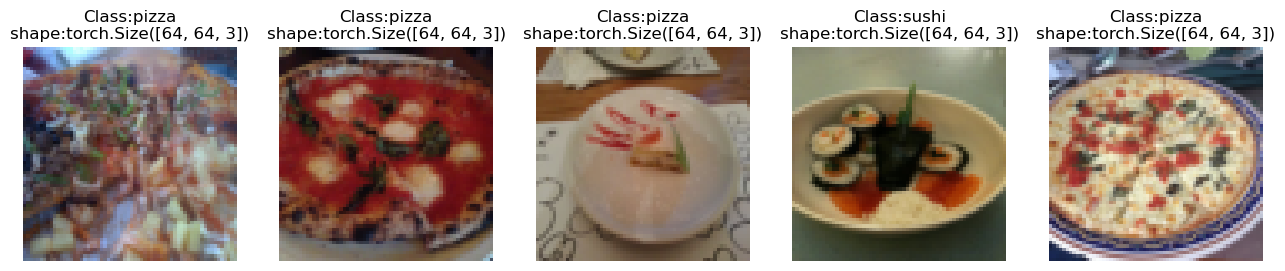

In [56]:
# Display random images from the ImageFolder created Dataset

display_random_images(train_data,
                     classes = class_names,
                     n=5,
                     seed = None)

For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display


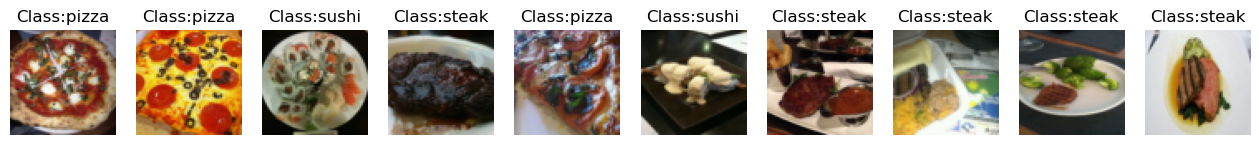

In [57]:
display_random_images(custom_train_dir,
                     classes = class_names,
                     n=20,
                     seed = None)

## DataLoader from the CustomDataset

In [58]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
#NUM_OF_WORKERS = os.cpu_count()

train_custom_dataloader = DataLoader(dataset= custom_train_dir,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle = True)

test_custom_dataloader = DataLoader(dataset= custom_test_dir,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle = False)

In [59]:
train_custom_dataloader,test_custom_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x14ac78110>,
 <torch.utils.data.dataloader.DataLoader at 0x14ad34450>)

In [60]:
first_batch_img,first_batch_label = next(iter(train_custom_dataloader))

first_batch_img.shape,first_batch_label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Image Augmentation (Transform)

### Let's look out at TrivialAugment

In [61]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size= (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5), # num_magnitude_bins is the intensity
    # 31 is the highest intensity
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size= (224,224)),
    transforms.ToTensor()
])

In [62]:
image_path

PosixPath('data/pizza_steak_sushi')

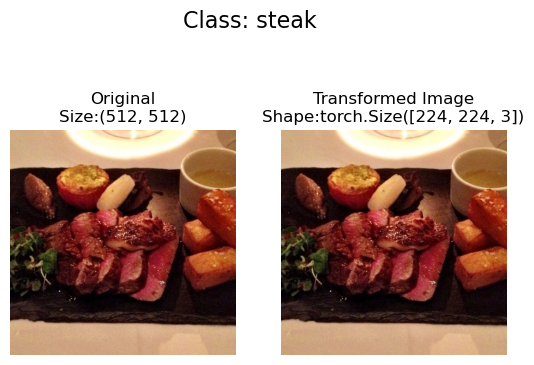

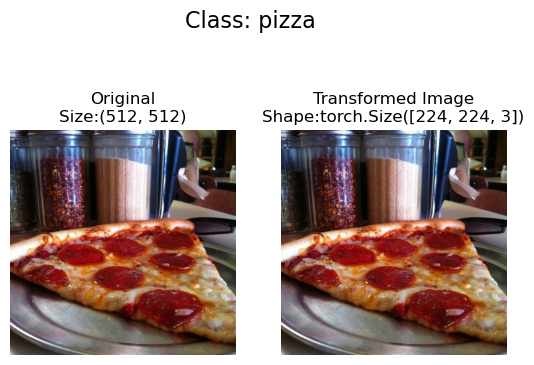

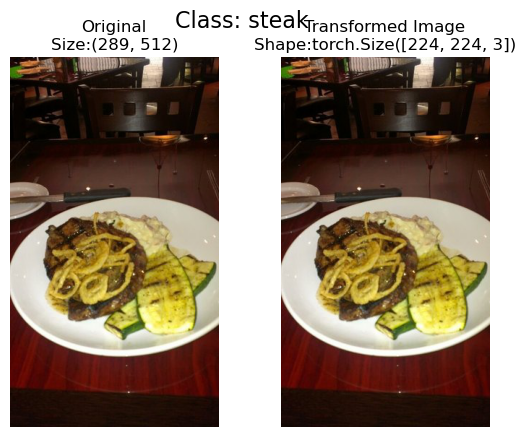

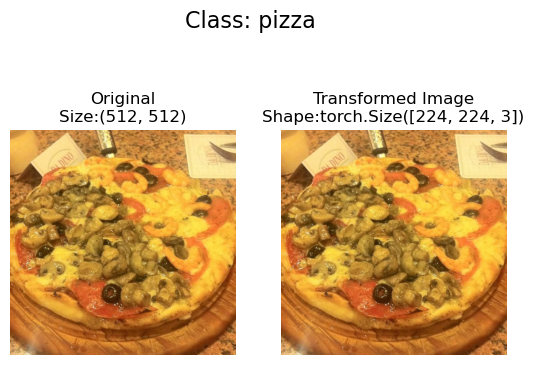

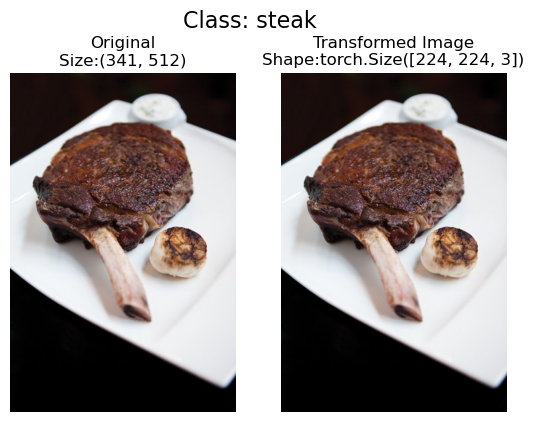

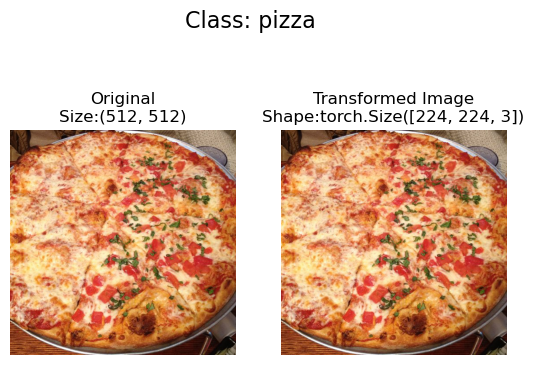

In [63]:
# Get all the image path
image_path_list = list(image_path.glob('*/*/*.jpg'))

plot_transformed_images(image_path_list,train_transform,n=6)

## Model 0: TinyVGG Model(without augmentation)

### Creating Transform and Loading data for Model 0

In [64]:
# Creating transform for baseline model
from torchvision import transforms

baseline_train_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    #transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

baseline_test_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

#### Prepare Dataset

In [65]:
# Loading data
from torchvision import datasets
from torchvision.datasets import ImageFolder
baseline_train_data = datasets.ImageFolder(root = train_dir,
                                          transform=baseline_train_transform,
                                          target_transform=None)

baseline_test_data = datasets.ImageFolder(root = test_dir,
                                          transform=baseline_test_transform)



In [66]:
baseline_train_data,baseline_test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

#### Prepare DataLoader

In [67]:
# Creating dataloader
from torch.utils.data import DataLoader
baseline_train_dataloader = DataLoader(dataset = baseline_train_data,
                                      batch_size=32,
                                      shuffle = True)

baseline_test_dataloader = DataLoader(dataset = baseline_test_data,
                                      batch_size=32,
                                      shuffle = False)

In [68]:
img,label = next(iter(baseline_train_dataloader))
img.shape,label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Device Agnostic Code

In [69]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

#### Baseline Model 

In [70]:
import torch.nn as nn

class BaseLineModelV0(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_unit:int,
                output_shape:int):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                     out_channels=hidden_unit,
                     kernel_size=3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*16*16,
                     out_features=output_shape)
        )
        

    def forward(self,x):
        return self.classifier(self.conv2(self.conv1(x)))
        

In [71]:
tinyvggbaselinemodel = BaseLineModelV0(input_shape=3,
                                      hidden_unit = 10,
                                      output_shape = 3).to(device)

In [72]:
tinyvggbaselinemodel

BaseLineModelV0(
  (conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## Use `torchinfo` to get an idea of the shapes going through our model

In [73]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo


from torchinfo import summary
summary(tinyvggbaselinemodel,input_size =[32,3,64,64] )

Layer (type:depth-idx)                   Output Shape              Param #
BaseLineModelV0                          [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [74]:
## Setup Loss and Optimizer Function

loss_fn = nn.CrossEntropyLoss()


# Optimizer funtion
optimizer = torch.optim.Adam(params = tinyvggbaselinemodel.parameters(),
                            lr = 0.001)


In [75]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file:
    print('The helper function already exists')
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

The helper function already exists


In [76]:
## Accuracy Function
from helper_functions import accuracy_fn

## Train and Test Loop

In [105]:
def train_loop(data:torch.utils.data.DataLoader,
              model:torch.nn.Module,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
               accuracy_fn = accuracy_fn,
              device = device):

    model.train()
    model.to(device)
    
    train_loss, acc = 0,0
    # extract image batch and their associated label
    
    for batch,(X,y) in enumerate(data):
        X,y = X.to(device),y.to(device)
        
        # forward Pass
        y_logit = tinyvggbaselinemodel(X)

        y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)
        
        # Calculate Loss
        loss = loss_fn(y_logit,y)
        train_loss +=loss.item()

        accuracy = accuracy_fn(y_true = y,
                              y_pred = y_pred)

        acc +=accuracy

        # Set the gradient zero
        optimizer.zero_grad()

        # Backward Propagation
        loss.backward()

        # optimizer step
        optimizer.step()


    train_loss = train_loss/len(data)
    train_acc = acc/len(data)

    return train_loss,train_acc
        

    

In [106]:
def test_loop(data:torch.utils.data.DataLoader,
              model:torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn = accuracy_fn,
              device = device):
    model.eval()
    model.to(device)

    test_loss,test_acc = 0,0

    with torch.inference_mode():
        for batch,(X, y) in enumerate(data):
            X,y = X.to(device),y.to(device)

            # forward pass
            y_logit = model(X)
            y_pred = torch.softmax(y_logit,dim= 1).argmax(dim =1)

            # Calculate Loss
            loss = loss_fn(y_logit,y)
            test_loss +=loss.item()

            acc = accuracy_fn(y,
                             y_pred)
            test_acc +=acc


        test_loss = test_loss/len(data)
        test_acc = test_acc/len(data)

    return test_loss,test_acc
            

In [109]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn
def train(model:torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn:torch.nn.Module,
          accuracy = accuracy_fn,
         epochs: int =5,
         device = device):

    # 2. Create empty results dictionary
    results = {"train_loss":[],
              "train_acc":[],
              "test_loss":[],
              "test_acc":[]}

    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = train_loop(data = baseline_train_dataloader,
                         model = tinyvggbaselinemodel,
                         loss_fn = loss_fn,
                          optimizer=optimizer
                         )
        test_loss,test_acc = test_loop(data = baseline_test_dataloader,
                       model = tinyvggbaselinemodel,
                       loss_fn=loss_fn)

        # printing
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)

    return results

## Train and evaluate model 0

In [110]:
# set random seeds
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Set number of epochs
NUM_EPOCHS= 5

# an instance of TinyVGG
model_0 = BaseLineModelV0(input_shape=3,
                         hidden_unit=10,
                         output_shape=len(baseline_train_data.classes)).to(device)

# setup Loss funtion and Optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train_model_0
model_0_train = train(model=model_0,
                     train_dataloader=baseline_train_dataloader,
                     test_dataloader=baseline_test_dataloader,
                     optimizer= optimizer,
                     loss_fn=loss_fn,
                     epochs=NUM_EPOCHS)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1033 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 1 | Train Loss: 1.1030 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 2 | Train Loss: 1.1017 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 3 | Train Loss: 1.1032 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 4 | Train Loss: 1.1018 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667


## Plot the Loss curves


In [95]:
model_0_train.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [111]:
print(model_0_train.items())

dict_items([('train_loss', [1.1032889783382416, 1.1030310243368149, 1.1016741693019867, 1.1031867265701294, 1.1018124520778656]), ('train_acc', [28.125, 28.125, 28.125, 28.125, 28.125]), ('test_loss', [1.0846447547276814, 1.0846447547276814, 1.0846447547276814, 1.0846447547276814, 1.0846447547276814]), ('test_acc', [54.166666666666664, 54.166666666666664, 54.166666666666664, 54.166666666666664, 54.166666666666664])])


In [112]:
import matplotlib.pyplot as plt
def plot_loss_curves(results):
    train_loss = results['train_loss']
    train_acc = results['train_acc']
    test_loss = results['test_loss']
    test_acc = results['test_acc']

    epochs = range(len(results['train_loss']))
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label = 'Train Loss')
    plt.plot(epochs,test_loss,label = 'Test Loss')

    plt.subplot(1,2,2)
    plt.plot(epochs,train_acc,label = 'Train Accuracy')
    plt.plot(epochs,test_acc,label = 'Test Accuracy')

    plt.legend()
    

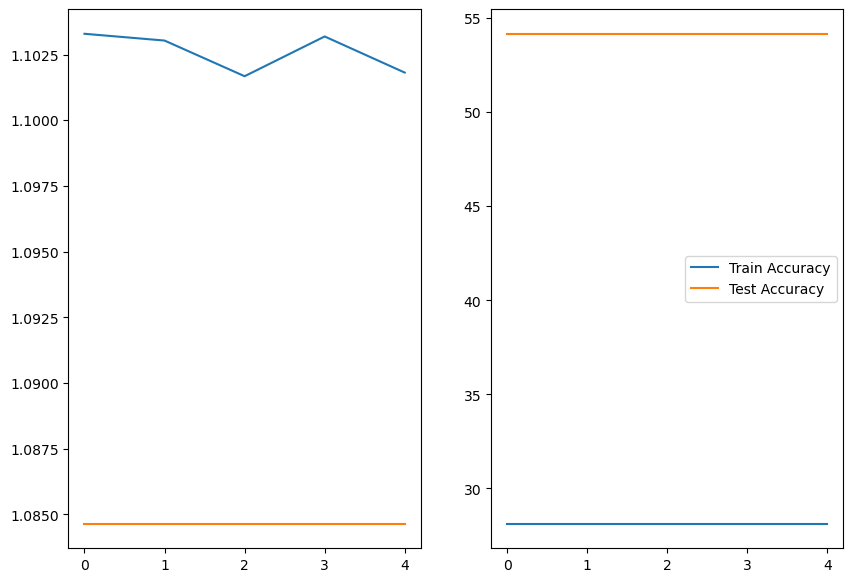

In [98]:
plot_loss_curves(model_0_train)

In [85]:
from typing import Dict,Tuple,List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plot training curves of a results dictionary"""
    # Get the loss values of the results dictionary(training and test)

    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))

    # setup a plot
    plt.figure(figsize = (15,7))

    # Plot the Loss
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label='train_loss')
    plt.plot(epochs,test_loss,label='test_loss')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # plot the accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label = 'train accuracy')
    plt.plot(epochs,test_accuracy,label = 'test accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

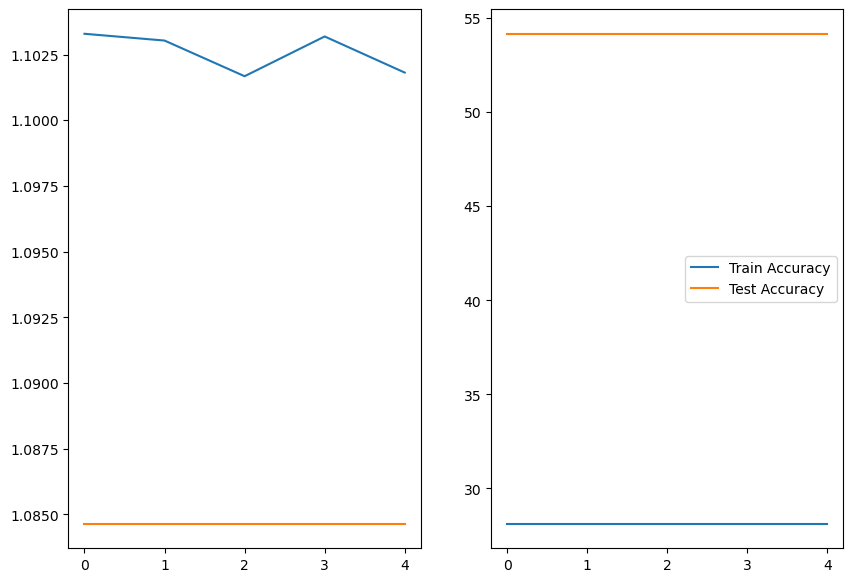

In [99]:
plot_loss_curves(model_0_train) 

## TinyVGG with Data Augmentation

In [100]:
### Create transform with data augmentation
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [102]:
# Turn image folders into dataset
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                           transform=train_transform_trivial)

test_data_augmented = datasets.ImageFolder(root = test_dir,
                                           transform=test_transform)

In [103]:
# Turn datasets into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 32

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle = True)

test_dataloader_augmented = DataLoader(dataset = test_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle = False)

In [104]:
torch.manual_seed(42)
model_1 = BaseLineModelV0(input_shape=3,
                         hidden_unit=10,
                         output_shape=len(train_data_augmented.classes)).to(device)
model_1

BaseLineModelV0(
  (conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [113]:
# Set random seeds
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup Loss Funtion
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train_model 1
model_1_train = train(model = model_1,
                     train_dataloader=train_dataloader_augmented,
                     test_dataloader=test_dataloader_augmented,
                     optimizer = optimizer,
                     loss_fn=loss_fn,
                     epochs = NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1017 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 1 | Train Loss: 1.1018 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 2 | Train Loss: 1.1020 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 3 | Train Loss: 1.1029 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667
Epoch: 4 | Train Loss: 1.1018 | Train acc: 28.1250 | Test Loss: 1.0846 | Test acc: 54.1667


In [ ]:
train_dir

In [ ]:
pathlib.Path(train_dir)

In [ ]:
ls = [1,2,34,4,5,6,7,7,8,983,54]
rand_item = random.sample(ls,k=3)
for i in rand_item:
    print(i)